# HW 3 CS-334
Hanna Meinikheim

8-30-2021

Linear Regression

# Linear Regression with scikit-learn
scikit-learn has done more to make Python the language of choice for ML than any other library (except maybe numpy). It’s used in academia, and we use it in industry. It’s worth your time to get to know scikit-learn, and how to read its documentation.

In this assignment, you will create a Jupyter notebook from scratch, and use scikit-learn to create a Linear Regression model.
1. Browse the scikit-learn documentation https://scikit-learn.org/stable/
2. Use this data:
data = ‘GPA’: [3.0, 3.7, 3.3, 2.5, 4.0, 3.2, 3.9, 3.0], ‘Hours Studied’:
[2, 8, 3, 1, 12, 7, 9, 5]
3. Create a Linear Regression model with the scikit-learn library Create
a new Jupyter notebook, import scikit-learn, and implement linear regression using the `LinearRegression().fit` function. Make sure to output the accuracy of your model.
4. Push Jupyter Notebook to github If you don’t already have a personal
GitHub account, please create one and learn how to use it (`clone, add, commit, push`). Add me as a contributor to your account so I can see your code. My GitHib account is `ckennington`.

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
import seaborn as sns

### Inputing data given

In [51]:
data = {'GPA': [3.0, 3.7, 3.3, 2.5, 4.0, 3.2, 3.9, 3.0], 
    'Hours Studied': [2, 8, 3, 1, 12, 7, 9, 5]
       }
df = pd.DataFrame(data, columns = ['GPA', 'Hours Studied'])

### Printing the data

In [52]:
print(df.shape)
df.head()

(8, 2)


,GPA,Hours Studied
0,3.0,2
1,3.7,8
2,3.3,3
3,2.5,1
4,4.0,12


### Plot on a graph

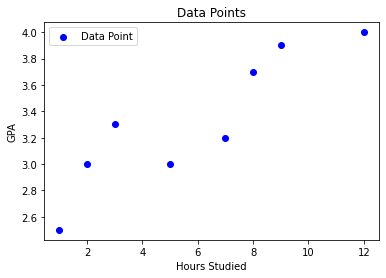

In [64]:
# Using the matplotlib library
X = df['Hours Studied'].values
Y = df['GPA'].values

# Plotting data points
plt.scatter(X, Y, color = 'blue', label = 'Data Point')

# axis labels
plt.xlabel("Hours Studied")
plt.ylabel("GPA")

plt.legend()
plt.title("Data Points")
plt.show()

### Calculate the line
Linear Regression, from scratch using "least squares" method.

In [73]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

# total number of values
n = len(X)

# using the least square method to calculate the b1 and b0 (y = mx + b, which is a line on a graph)
numerator = 0 # covariance
denominator = 0 # variance
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

b1 = numerator / denominator # slope
b0 = y_mean - (b1 * x_mean) # y-intercept

# print the slope (b1) and the y-intercept (b0)
print("Slope: ", b1,"\nY-intercept: ", b0)

Slope:  0.12118959107806693 
Y-intercept:  2.613011152416357


### Plotting the line against the data

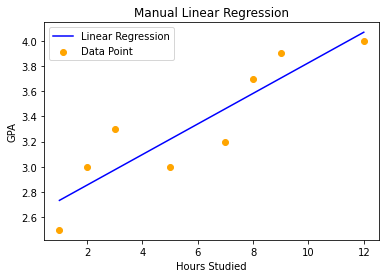

In [56]:
# graph dimensions
x_max = np.max(X)
x_min = np.min(X)

# calculating the line of values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting the line
plt.plot(x, y, color = "Blue", label = "Linear Regression")

#plot the data points
plt.scatter(X, Y, color = "orange", label = "Data Point")

#x-axis label
plt.xlabel("Hours Studied")
#y-axis label
plt.ylabel("GPA")

plt.legend()
plt.title("Manual Linear Regression")
plt.show()

The idea is that for a given number of hours studied, the line tells you the mean GPA.

### How good is this "model"?
Every model has ways (usually more than one) to determine accuracy.
This example shows how good this model is depends on how much "error" there is between the model and all the data points.
If you give it a new data point, it basically shows how much you can "trust" the model.

In [58]:
# Root mean squared Error "rmse" method.
rmse = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)
# Lower is better. 0.0 is a perfect model, no errors.

0.21019551882432927


In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [60]:
# need to reshape data for x
x_reshape = X.reshape((-1, 1))
#print(x_reshape)
model = LinearRegression().fit(x_reshape, Y)

In [61]:
#getting results
r_sq = model.score(x_reshape, Y)
print("coefficent of determination (R^2): ", r_sq)
print("y-intercept: ", model.intercept_)
print("slope: ", model.coef_)

coefficent of determination (R^2):  0.8073802457380754
y-intercept:  2.613011152416357
slope:  [0.12118959]


In [62]:
# Root mean squared Error "rmse" method.
rms = 0
for i in range(n):
    y_preds = model.intercept_ + model.coef_*X[i]
    rms += (Y[i] - y_preds) ** 2
rms = np.sqrt(rms/n)
print("Root mean square error: ", rms)

Root mean square error:  [0.21019552]


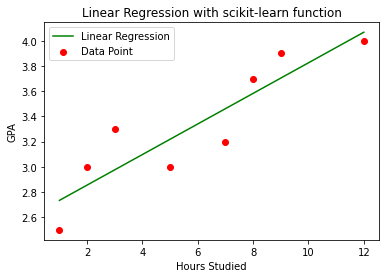

In [72]:
# graph dimensions
x_max = np.max(X)
x_min = np.min(X)

# calculating the line of values of x and y
xe = np.linspace(x_min, x_max, 1000)
ye = model.intercept_ + model.coef_ * x

#plotting the line
plt.plot(xe, ye, color = "Green", label = "Linear Regression")

#plot the data points
plt.scatter(X, Y, color = "Red", label = "Data Point")

#x-axis label
plt.xlabel("Hours Studied")
#y-axis label
plt.ylabel("GPA")

plt.legend()
plt.title("Linear Regression with scikit-learn function")
plt.show()